GitHub Link: https://github.com/PoolyDsXForce/COMP3800_Fall2024

Link to Data: https://catalog.data.gov/dataset/recalls-data

This data contains the information related to recalls and the manufacturers and the type of recalls from 1966 to current by the National Highway Traffic Saftey Administration.

Main Inquiry Question: What is the main cause of recalls on automotive vehicles since 1966?

Sub-questions:
1. Which manufacturer has the most recalls since 1966?
2. What is the most common recall type across the automotive industry since 1966?
3. Has the advancement in technology since 2000 created more recalls on average compared to 1966-1999?


In [304]:
#Imported Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [305]:
#Imported file with data and loaded the dataframe
df = pd.read_csv('recalls_data.csv')

In [306]:
#Printing shape, data types, and first 10 rows of data.
print("shape", df.shape)
print(df.dtypes)
print(df.head(10))

shape (28329, 15)
Report Received Date                         object
NHTSA ID                                     object
Recall Link                                  object
Manufacturer                                 object
Subject                                      object
Component                                    object
Mfr Campaign Number                          object
Recall Type                                  object
Potentially Affected                        float64
Recall Description                           object
Consequence Summary                          object
Corrective Action                            object
Park Outside Advisory                        object
Do Not Drive Advisory                        object
Completion Rate % (Blank - Not Reported)    float64
dtype: object
  Report Received Date   NHTSA ID  \
0           09/13/2024  24V686000   
1           09/12/2024  24V676000   
2           09/11/2024  24V662000   
3           09/11/2024  24V664000   
4  

In [307]:
#Checking Missing Data In Each Column
print(df.isnull().sum())
#Checking Percentage of Missing Data In Each Column
for cols in df.columns:
    percent_missing = (df[cols].isnull().sum()/df.shape[0])
    print(cols, round(percent_missing, 2))

Report Received Date                            0
NHTSA ID                                        0
Recall Link                                     0
Manufacturer                                    0
Subject                                         0
Component                                       0
Mfr Campaign Number                            47
Recall Type                                     0
Potentially Affected                           41
Recall Description                           2401
Consequence Summary                          4888
Corrective Action                            2388
Park Outside Advisory                           0
Do Not Drive Advisory                           0
Completion Rate % (Blank - Not Reported)    18646
dtype: int64
Report Received Date 0.0
NHTSA ID 0.0
Recall Link 0.0
Manufacturer 0.0
Subject 0.0
Component 0.0
Mfr Campaign Number 0.0
Recall Type 0.0
Potentially Affected 0.0
Recall Description 0.08
Consequence Summary 0.17
Corrective Action 0.08
Par

In [308]:
#Dropping unwanted columns except for Report Received Date, Manufacturer, Subject, Component, Recall Type.
df_selectedColumns = df[['Report Received Date', 'Manufacturer', 'Subject', 'Component', 'Recall Type']]
print(df_selectedColumns.shape)

(28329, 5)


In [309]:
#Display the top 10 most recall Manufacturers
df_order = df_selectedColumns["Manufacturer"].value_counts()
print(df_order.head(10))

Manufacturer
General Motors, LLC                  1654
Ford Motor Company                   1499
Chrysler (FCA US, LLC)               1410
Forest River, Inc.                    559
Volkswagen Group of America, Inc.     554
BMW of North America, LLC             542
Daimler Trucks North America, LLC     516
Mercedes-Benz USA, LLC                463
Honda (American Honda Motor Co.)      430
Nissan North America, Inc.            421
Name: count, dtype: int64


The manufacturer that has the most recalls since 1966 per the data in this dataset as shown above and provided by the NHTSA is General Motors LLC followed by Ford Motor Company and Chrysler (FCA US, LLC). The reason they have the most recalls are that they are the largest automotive manufacturers in the United States and so would have more recalls on a variety of vehicles than say Lamborghini who only makes a percent of the amount of vehicles as the ones listed above. 

In [311]:
#Display the top 10 component type of recalls
df_order = df_selectedColumns["Component"].value_counts()
print(df_order.head(10))

Component
EQUIPMENT                    3972
ELECTRICAL SYSTEM            2453
STEERING                     1944
SERVICE BRAKES, HYDRAULIC    1714
SUSPENSION                   1645
FUEL SYSTEM, GASOLINE        1419
STRUCTURE                    1333
POWER TRAIN                  1331
EXTERIOR LIGHTING            1159
ENGINE AND ENGINE COOLING    1135
Name: count, dtype: int64


Above shows that the main type of components that the recalls were related to were due to equipment, and electrical system followed by steering and hydraulic service brakes. This makes sense as the advancement in technology and improving on already designed components and the adding of different features would lead to an increase on recalls which catch what the engineers could not have predicted to be an issue during the design phase of the vehicle. 

In [313]:
#Display the top recall types in the data
df_order = df["Recall Type"].value_counts()
print(df_order.head(4))

Recall Type
Vehicle       24640
Equipment      2694
Tire            758
Child Seat      237
Name: count, dtype: int64


This shows that the top recall type was in fact vehicle type recalls were the most amount by 10 times the next which is equipment types followed by tire and child seat related types. This differs from above as equipment was the #1 component related to the recall which shows that vehicle type recall must contain parts that have components listed as many different things such as electrical system, steering and equipment as well. 

In [315]:
#Display the shape of data which then gives a count of the data of how many recalls from 1966-1999 and of 2000 to current and change the data type of Report Received Date to a datetime.
print(df_selectedColumns['Report Received Date'].dtypes)
df['Report Received Date'] = pd.to_datetime(df['Report Received Date'])

before_2000 = df_selectedColumns[df_selectedColumns['Report Received Date'] < '2000-01-01']
after_2000 = df_selectedColumns[df_selectedColumns['Report Received Date'] >= '2000-01-01']

print(before_2000.shape)
print(after_2000.shape)

object
(28329, 5)
(0, 5)


Based on the data shown above prior to January 1, 2000 there were a total of 8,742 recalls across all manufacturers of vehicles. From January 1, 2000 to current there are 19,587 recalls across al manufacturers of vehicles. This means that since 2000 the recalls have increased by 224%. There are other factors that can contribute to this such as more new manufacturers, advancement of technology, stricter guidelines set out by goverment agencies and the NHTSA. 

In [317]:
#Display a pivot table that shows the count values of recalls by manufacture
df_pivot = df.pivot_table(index='Manufacturer', values='Mfr Campaign Number', aggfunc='count', margins = False)
sorted_pivot = df_pivot.sort_values(by='Mfr Campaign Number', ascending=False)
print(sorted_pivot)

                                   Mfr Campaign Number
Manufacturer                                          
General Motors, LLC                               1654
Ford Motor Company                                1499
Chrysler (FCA US, LLC)                            1410
Forest River, Inc.                                 559
Volkswagen Group of America, Inc.                  554
...                                                ...
A.L. Solutions US                                    0
PTL Engineering, Inc                                 0
Alpha Technology Corp                                0
Wallace Forge Company                                0
Nitrous Supply                                       0

[3027 rows x 1 columns]


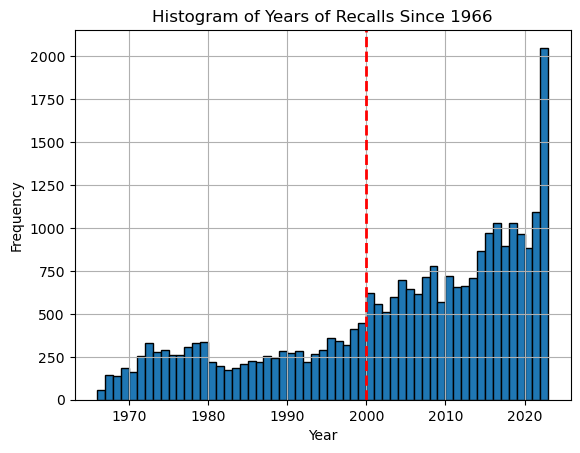

In [318]:
#Create a histogram to show the increase in recalls by year since 1966 and place a marker to show from year 2000 and on. 
df_datehist= df['Report Received Date'].dt.year
df_datehist.hist( bins=range(1966, 2024), edgecolor='black')
plt.title('Histogram of Years of Recalls Since 1966')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)
plt.show()

Above is a histogram showing the increase in recalls from 1966 to 1999 and a red line separates this time frame from 2000 to current. There is a 

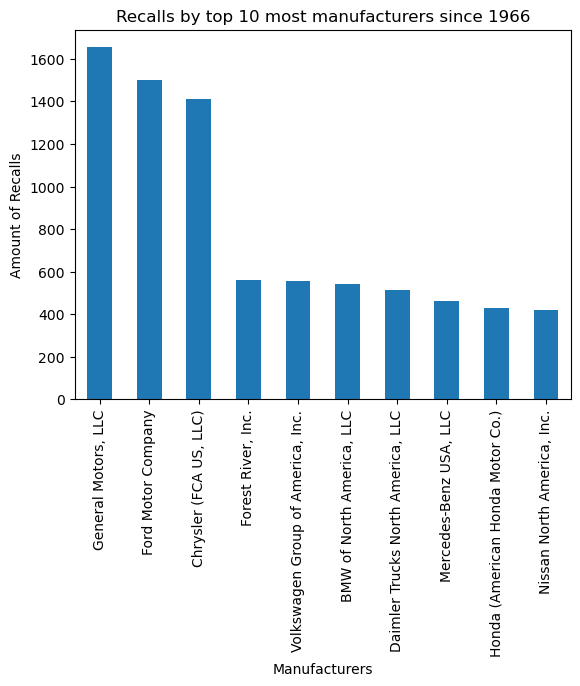

In [320]:
#Display a bar graph showing the top 10 manufacturers with the most amount of recalls since 1966
top_10 = df['Manufacturer'].value_counts().nlargest(10)
top_10.plot(kind = 'bar')

# Graph Labeling
plt.title('Recalls by top 10 most manufacturers since 1966')
plt.xlabel('Manufacturers')
plt.ylabel('Amount of Recalls')
plt.xticks(rotation=90)

plt.show()

Summary: During my analysis of the data on recalls on motor vehicles provided by the NHTSA from 1966 to current, I have found that recalls have increased significantly since then and more recently in the years since 2000 and more recently since 2020. Having worked in the automotive industry and dealing with recalls daily I can speculate based on the histogram graph provided that the spike in recalls from 2020 was due to production as companies were either having to send out unfinished units to the consumer that would then get a recall to provide what was not given during production. Another possible reason was the quality of production during that time as people were out with COVID-19 and there was a shortage of workers due to the automotive union being on strike as well. This appears to likely have caused an influx in temporary employees and persons not trained to the proper standard causing subpar work to be put out which later needed a recall to fix.  Prior to the 2000 most of the recalls were parts or safety related recalls. From the advancement in technology and more integration of said technology into vehicles, the types of recalls since 2000 have been a lot of technology update, consumer satisfaction, and safety/emissions related recalls. This appears to be due to the global climate change and crack down on vehicle emissions causing companies to further conform to these standards, along with the growing need for consumer happiness and safety creating the other recalls I believed that the advancement in technology has a direct correlation to the increase in recalls in the years since 2000.  
